In [1]:
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

import scipy.stats as ss
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
#from mlxtend.plotting import plot_learning_curves
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve
from sklearn.metrics import f1_score

## Our dataframe

In [2]:
df = pd.read_csv('ES.csv')

C:\Users\01jav\.conda\envs\JAVIER\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.shape

(630020, 164)

## Filtering our dataframe

In [4]:
df1 = df[df['B7.1']==1]
df2 = df1[df1['B8.NA']==0]
df_filter = df2[df2['B8.3']==0]

In [5]:
df_filter.shape

(73205, 164)

In [6]:
df_filter.head()

,weight,Finished,B2,B4,B15_1,B15_2,B15_3,B15_4,B15_5,B15_6,...,E4.3,E4.4,E4.5,E4.6,E4.7,E4.NA,E2.1,E2.2,E2.3,E2.NA
28,4850.905645,1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
35,23556.169863,1,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0
74,14313.592407,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,1,0,0
92,4777.753845,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,1,0,0,0
93,5297.011001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0


## Creating additional columns

In [18]:
list_risk = []
for i in range(len(df_filter.index)):
    risk= 1*df_filter['B1_4.1'][df_filter.index[i]] + 2*df_filter['B1_1.1'][df_filter.index[i]] + 5*df_filter['B1_10.1'][df_filter.index[i]]
    list_risk.append(risk)

df_filter['risk']=list_risk

<ipython-input-18-1c1f7ad1e78a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['risk']=list_risk


In [22]:
list_sum_sym=[]

for i in range(len(df_filter.index)):
    sum_sym= np.sum(df_filter['B1_4.1'][df_filter.index[i]]+df_filter['B1_10.1'][df_filter.index[i]]+df_filter['B1_3.1'][df_filter.index[i]]+df_filter['B1_13.1'][df_filter.index[i]]+df_filter['B1_1.1'][df_filter.index[i]]+df_filter['B1_7.1'][df_filter.index[i]]+df_filter['B1_2.1'][df_filter.index[i]]+df_filter['B1_12.1'][df_filter.index[i]])
    list_sum_sym.append(sum_sym)

df_filter['sum_sym']=list_sum_sym

<ipython-input-22-80b1b7d93590>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['sum_sym']=list_sum_sym


In [32]:
list_sm = []
for i in range(len(df_filter.index)):
    
    if (df_filter['risk'][df_filter.index[i]]>=3  and df_filter['sum_sym'][df_filter.index[i]]>=3):
        list_sm.append(1)
    else:
        list_sm.append(0)

df_filter['spanish_method'] = list_sm

<ipython-input-32-5a328a219f82>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['spanish_method'] = list_sm


## Results. Risk >3 and symptoms >3

Accuracy Score: 0.9046923024383581
Area Under Curve: 0.6750605049797092
Recall score: 0.3705555555555556

Specificity: 0.9795654544038627
F1 score: 0.4887521066901151
Precision score: 0.7176673122444588
[[62893  1312]
 [ 5665  3335]]

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     64205
           1       0.72      0.37      0.49      9000

    accuracy                           0.90     73205
   macro avg       0.82      0.68      0.72     73205
weighted avg       0.89      0.90      0.89     73205



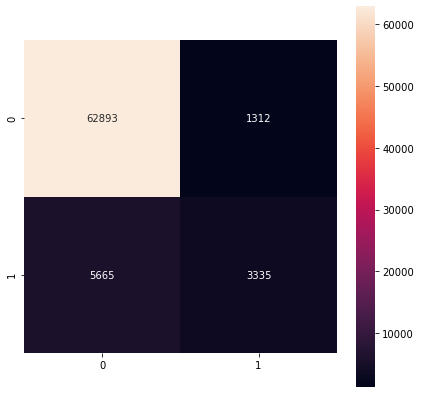

In [33]:
Y_test = df_filter['B8.1']
y_pred = df_filter['spanish_method']

print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Results. Risk > 3 and symptoms >4

In [34]:
list_sm_4 = []
for i in range(len(df_filter.index)):
    
    if (df_filter['risk'][df_filter.index[i]]>=3  and df_filter['sum_sym'][df_filter.index[i]]>=4):
        list_sm_4.append(1)
    else:
        list_sm_4.append(0)

df_filter['spanish_method_4'] = list_sm_4

<ipython-input-34-64ac8b42a87d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['spanish_method_4'] = list_sm_4


Accuracy Score: 0.900293695785807
Area Under Curve: 0.6439398800716455
Recall score: 0.304

Specificity: 0.983879760143291
F1 score: 0.4284707540521494
Precision score: 0.7255369928400954
[[63170  1035]
 [ 6264  2736]]

              precision    recall  f1-score   support

           0       0.91      0.98      0.95     64205
           1       0.73      0.30      0.43      9000

    accuracy                           0.90     73205
   macro avg       0.82      0.64      0.69     73205
weighted avg       0.89      0.90      0.88     73205



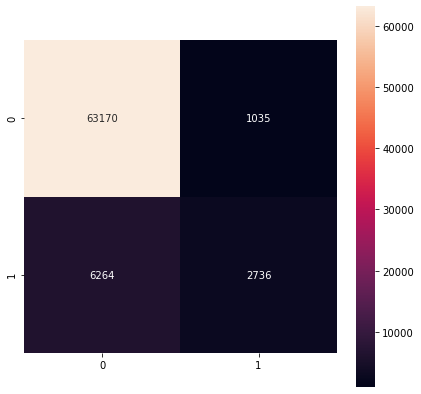

In [35]:
Y_test = df_filter['B8.1']
y_pred = df_filter['spanish_method_4']

print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
print(f'Recall score: {recall_score(Y_test,y_pred)}')
print("")
matrix = confusion_matrix(Y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

print('Specificity:', tn/(tn+fp))
print(f'F1 score: {f1_score(Y_test,y_pred)}')
print(f'Precision score: {precision_score(Y_test,y_pred)}')
print(matrix)
print("")
print(classification_report(Y_test, y_pred))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Spanish_method. Function

In [38]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [39]:
def spanish_method(iso2,sym):
    df = pd.read_csv(iso2+'.csv')
    df1 = df[df['B7.1']==1]
    df2 = df1[df1['B8.NA']==0]
    df_filter = df2[df2['B8.3']==0]
    
    list_risk = []
    for i in range(len(df_filter.index)):
        risk= 1*df_filter['B1_4.1'][df_filter.index[i]] + 2*df_filter['B1_1.1'][df_filter.index[i]] + 5*df_filter['B1_10.1'][df_filter.index[i]]
        list_risk.append(risk)
    df_filter['risk']=list_risk
    
    
    list_sum_sym=[]
    for i in range(len(df_filter.index)):
        sum_sym= np.sum(df_filter['B1_4.1'][df_filter.index[i]]+df_filter['B1_10.1'][df_filter.index[i]]+df_filter['B1_3.1'][df_filter.index[i]]+df_filter['B1_13.1'][df_filter.index[i]]+df_filter['B1_1.1'][df_filter.index[i]]+df_filter['B1_7.1'][df_filter.index[i]]+df_filter['B1_2.1'][df_filter.index[i]]+df_filter['B1_12.1'][df_filter.index[i]])
        list_sum_sym.append(sum_sym)
    df_filter['sum_sym']=list_sum_sym
    

    list_sm = []
    for i in range(len(df_filter.index)):
        if (df_filter['risk'][df_filter.index[i]]>=3  and df_filter['sum_sym'][df_filter.index[i]]>=sym):
            list_sm.append(1)
        else:
            list_sm.append(0)
    df_filter['spanish_method'] = list_sm
    
    Y_test = df_filter['B8.1']
    y_pred = df_filter['spanish_method']

    print(f'Accuracy Score: {accuracy_score(Y_test,y_pred)}')
    print(f'Area Under Curve: {roc_auc_score(Y_test, y_pred)}')
    print(f'Recall score: {recall_score(Y_test,y_pred)}')
    print("")
    matrix = confusion_matrix(Y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(Y_test, y_pred).ravel()

    print('Specificity:', tn/(tn+fp))
    print(f'F1 score: {f1_score(Y_test,y_pred)}')
    print(f'Precision score: {precision_score(Y_test,y_pred)}')
    print(matrix)
    print("")
    print(classification_report(Y_test, y_pred))
    plt.figure(figsize=(7,7))
    sns.heatmap(matrix,annot=True, square = True, fmt='g')
    plt.show()
    
    
    

Accuracy Score: 0.9046923024383581
Area Under Curve: 0.6750605049797092
Recall score: 0.3705555555555556

Specificity: 0.9795654544038627
F1 score: 0.4887521066901151
Precision score: 0.7176673122444588
[[62893  1312]
 [ 5665  3335]]

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     64205
           1       0.72      0.37      0.49      9000

    accuracy                           0.90     73205
   macro avg       0.82      0.68      0.72     73205
weighted avg       0.89      0.90      0.89     73205



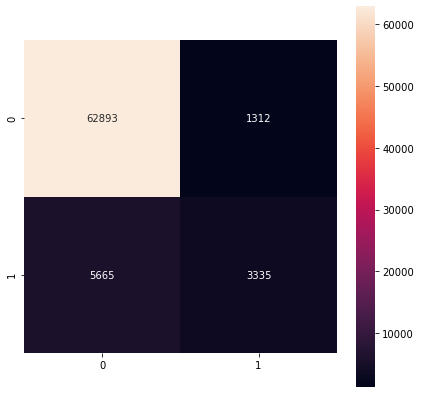

In [40]:
spanish_method('ES',3)